<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/Atividade_1_Modelos_introdut%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 1

## Modelos Introdutórios

Neste *notebook* você deverá trabalhar com os modelos estudados até aqui:

- Árvore de decisão
- Naive Bayes
- k-NN

Para cada modelo você deverá:

- Fazer ajuste de hiperparâmetros usando um conjunto de treinamento e um conjunto de validação
- Testar o modelo usando um conjunto de treinamento e um conjunto de testes

### Passo 1: Importe as bibliotecas e carregue os dados

Vamos importar todas as bibliotecas e funções de uma vez:

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Use a função `pd.read_csv()` para carregar o arquivo de treinamento (`iris-treino.csv`).

Vamos trabalhar com os arquivos disponibilizados no ColabWeb.

In [96]:
treino = pd.read_csv("/iris-treino.csv")   # <-- complete o código

In [97]:
teste =pd.read_csv("/iris-teste.csv")   # <-- complete o código

Use a função `pd.read_csv()` para carregar o arquivo de teste (`iris-teste.csv`).

## Atributo

In [98]:
treino

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,virginica
1,5.1,3.3,1.7,0.5,setosa
2,6.7,2.5,5.8,1.8,virginica
3,5.6,2.5,3.9,1.1,versicolor
4,4.4,3.2,1.3,0.2,setosa
...,...,...,...,...,...
59,4.7,3.2,1.3,0.2,setosa
60,6.6,2.9,4.6,1.3,versicolor
61,6.4,3.2,4.5,1.5,versicolor
62,6.4,2.9,4.3,1.3,versicolor


### Classe

teste

### Passo 2: processamento da classe

A última coluna contém o conceito (o resultado correto do mapeamento).

O DataFrame contém strings para o conceito (nome da espécie). O scikit-learn requer que esse conceito seja composto por valores numéricos.

Use a classe `LabelEncoder` para transformar esses valores em numéricos.

In [99]:
treino_le = LabelEncoder()

Primeiro, use `fit` sobre o conjunto de treinamento para "aprender" o mapeamento de string para inteiro

In [100]:
treino_le.fit(treino.iloc[:, -1])

LabelEncoder()

Agora, use `transform` para substituir as strings pelos valores numéricos. (**Observação**: dependendo da sua versão do Pandas, pode aparecer uma mensagem advertência na linha abaixo; ela pode ser ignorada)

In [101]:
treino.iloc[:, -1] = treino_le.transform(treino.iloc[:, -1])

<ipython-input-101-89af34ef116e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  treino.iloc[:, -1] = treino_le.transform(treino.iloc[:, -1])


In [102]:
treino

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,2
1,5.1,3.3,1.7,0.5,0
2,6.7,2.5,5.8,1.8,2
3,5.6,2.5,3.9,1.1,1
4,4.4,3.2,1.3,0.2,0
...,...,...,...,...,...
59,4.7,3.2,1.3,0.2,0
60,6.6,2.9,4.6,1.3,1
61,6.4,3.2,4.5,1.5,1
62,6.4,2.9,4.3,1.3,1


Agora faça o mesmo com o teste.

In [103]:
teste_le=LabelEncoder()

In [104]:
teste_le.fit(teste.iloc[:, -1])#complete o código

LabelEncoder()

In [105]:
teste.iloc[:, -1] = teste_le.transform(teste.iloc[:, -1])

<ipython-input-105-9d42ab1ff2cd>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  teste.iloc[:, -1] = teste_le.transform(teste.iloc[:, -1])


In [106]:
teste


,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,2
1,6.3,3.3,6.0,2.5,2
2,7.2,3.2,6.0,1.8,2
3,7.0,3.2,4.7,1.4,1
4,6.8,2.8,4.8,1.4,1
...,...,...,...,...,...
81,5.6,3.0,4.1,1.3,1
82,6.0,2.2,5.0,1.5,2
83,6.3,3.4,5.6,2.4,2
84,7.1,3.0,5.9,2.1,2


### Passo 3: Treino e teste dos modelos

Usando os conhecimentos que você aprendeu nas aulas anteriores, treine e teste os modelos de árvore de decisão, Naive Bayes e k-NN.

Não faça nenhum ajuste de hiperparâmetros. Use as configurações *default* de cada uma das classes.

In [107]:
Xtreino=treino.iloc[:,: -1]

In [108]:
Xtreino

,sepal_length,sepal_width,petal_length,petal_width
0,6.2,3.4,5.4,2.3
1,5.1,3.3,1.7,0.5
2,6.7,2.5,5.8,1.8
3,5.6,2.5,3.9,1.1
4,4.4,3.2,1.3,0.2
...,...,...,...,...
59,4.7,3.2,1.3,0.2
60,6.6,2.9,4.6,1.3
61,6.4,3.2,4.5,1.5
62,6.4,2.9,4.3,1.3


In [109]:
ytreino=treino.iloc[:, -1]

In [110]:
ytreino

0     2
1     0
2     2
3     1
4     0
     ..
59    0
60    1
61    1
62    1
63    1
Name: species, Length: 64, dtype: int64

### Criando um arquivo

import pickle
with open('iris_treino.pkl','wb')as f:
    pickle.dump([Xtreino,ytreino],f)

In [111]:
Xtest = teste.iloc[:, :-1].values

In [112]:
Xtest

array([[7.7, 3.8, 6.7, 2.2],
       [6.3, 3.3, 6. , 2.5],
       [7.2, 3.2, 6. , 1.8],
       [7. , 3.2, 4.7, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [5.8, 2.7, 3.9, 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.7, 2.8, 4.1, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.5, 1.6, 0.6],
       [6.8, 3.2, 5.9, 2.3],
       [5.5, 2.5, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 3. , 4.6, 1.4],
       [4.4, 2.9, 1.4, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.3, 2.9, 5.6, 1.8],
       [4.7, 3.2, 1.6, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [7.3, 2.9, 6.3, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.3, 4.4, 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.7, 3.1, 5.6, 2.4],
       [5.5, 2.3, 4. , 1.3],
       [4.4, 3

In [113]:
ytest=teste.iloc[:,-1]

In [114]:
ytest

0     2
1     2
2     2
3     1
4     1
     ..
81    1
82    2
83    2
84    2
85    2
Name: species, Length: 86, dtype: int64

###Modelos Default

#Arvore de Decisão

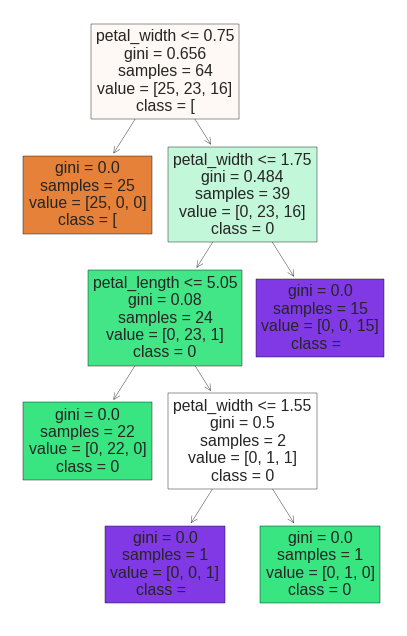

In [173]:
clfAV1 = DecisionTreeClassifier()
clfAV1.fit(Xtreino,ytreino);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,8))
tree.plot_tree(clfAV1, feature_names=previsores,class_names=str(clfAV1.classes_), filled=True);
fig.savefig('Arvore_1.png')

In [174]:
acAV1=accuracy_score(y_val,ypredAV1)
acAV1

0.95

KNN

In [116]:
knn_treino1=KNeighborsClassifier()
knn_treino1.fit(Xtreino,ytreino)
ypredKNN1=knn_treino1.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [176]:
acKNN=accuracy_score(y_val,ypredAV1)
acKNN

0.95

Naive Baise

In [117]:
GNB=GaussianNB()
GNB.fit(Xtreino,ytreino)
ypredNB=GNB.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [177]:
acNB=accuracy_score(y_val,ypredAV1)
acNB

0.95

### Passo 3,5: Verificação do *notebook*

Para a próxima atividade você precisará que as variáveis `treino` e `teste` estejam da forma como ela foi carregada. Execute a célula abaixo e, se qualquer um dos testes falhar, faça novamente os passos 1 e 2.

In [119]:
if treino.shape != (64, 5):print("O número de linhas ou colunas do treino está errado.")
if teste.shape != (86, 5): print("O número de linhas ou colunas do teste está errado.")

if treino.iloc[:,-1].dtype != int: print('A última coluna do treino não é numérica.')
if teste.iloc[:,-1].dtype != int: print('A última coluna do teste não é numérica.')

soma_treino = np.array([365.9, 198.7, 221.4,  69.2,  55. ])
soma_teste = np.array([510.6, 259.9, 342.3, 110.7,  95. ])

if (np.abs(treino.sum() - soma_treino) > 0.1).any(): print('Existem valores incorretos na tabela de treino.')
if (np.abs(teste.sum() - soma_teste) > 0.1).any(): print('Existem valores incorretos na tabela de teste.')

### Passo 4: Ajuste de hiperparâmetros

Agora vamos verificar se é possível ajustar os hiperparâmetros de acordo com um conjunto de validação.

A ideia é simples, vamos dividir o conjunto de treino em um **novo conjunto de treino** e um conjunto de validação. Podemos fazer isso utilizando a função `train_test_split`.

In [178]:
X_train, X_test, y_train, y_test = train_test_split(treino.iloc[:, :-1], treino.iloc[:, -1],
                                                    random_state=42, test_size=0.3, stratify=treino.iloc[:, -1])

In [121]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,6.6,2.9,4.6,1.3
5,5.9,3.0,5.1,1.8
1,5.1,3.3,1.7,0.5
18,6.6,3.0,4.4,1.4
53,6.7,3.3,5.7,2.1
14,6.2,2.8,4.8,1.8
15,6.1,2.8,4.7,1.2
33,5.5,4.2,1.4,0.2
8,5.1,3.8,1.5,0.3
21,4.8,3.0,1.4,0.3


In [122]:
y_test

31    2
63    1
34    0
47    0
42    2
36    1
62    1
20    0
41    1
48    1
49    0
46    1
27    0
32    1
51    0
7     2
59    0
16    0
2     2
28    2
Name: species, dtype: int64

#### Árvore de Decisão

Teste diferentes configurações da árvore de decisão com o conjunto de validação.

1) Verifique se o desempenho do modelo usa quando o critério é alterado para `criterion='entropy'`.

In [179]:
X_train, X_val, y_train, y_val = train_test_split(treino.iloc[:, :-1], treino.iloc[:, -1],
                                                    random_state=42, test_size=0.3, stratify=treino.iloc[:, -1])

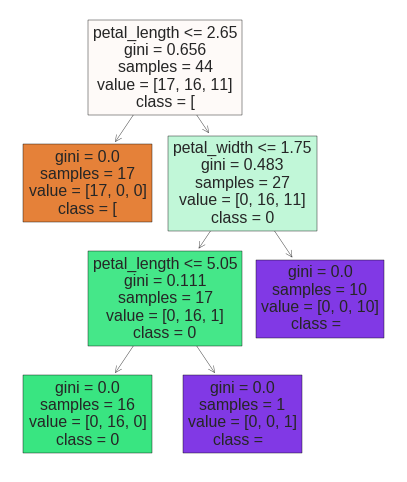

In [180]:
clfAV1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clfAV1.fit(X_train,y_train);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,6))
tree.plot_tree(clfAV1, feature_names=previsores,class_names=str(clfAV1.classes_), filled=True);
fig.savefig('Arvore_1.png')
# Continue o código para treinar a árvore com (X_train, y_train) e testar a árvore com (X_val, y_val)

In [125]:
ypredAV1=clfAV1.predict(X_val)

In [126]:
ypredAV1

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

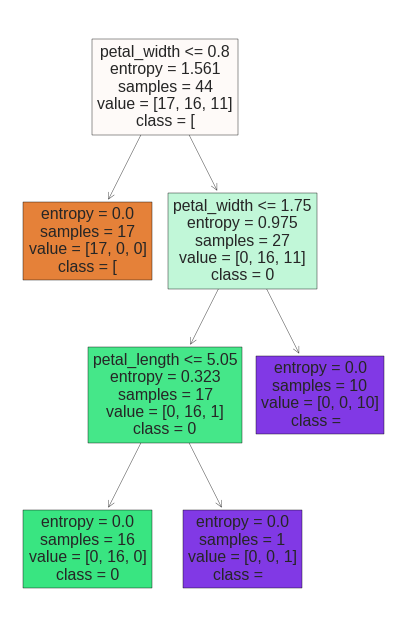

In [127]:
clfAV2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clfAV2.fit(X_train,y_train);
previsores=['sepal_length',	'sepal_width',	'petal_length',	'petal_width']
fig,exes=plt.subplots(nrows=1, ncols=1, figsize=(5,8))
tree.plot_tree(clfAV2, feature_names=previsores,class_names=str(clfAV2.classes_), filled=True);
fig.savefig('Arvore_2.png')

In [128]:
ypredAV2=clfAV2.predict(X_val)

In [129]:
ypredAV2

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [130]:
y_val

31    2
63    1
34    0
47    0
42    2
36    1
62    1
20    0
41    1
48    1
49    0
46    1
27    0
32    1
51    0
7     2
59    0
16    0
2     2
28    2
Name: species, dtype: int64

2) Verifique se o desempenho do modelo usa quando especificamos uma altura máxima para a árvore. Para especificar a altura máxima da árvore, use o argumento `max_depth=ALTURA` quando for instanciar o objeto da classe `DecisionTreeClassifier`.

In [132]:
ypredAV1

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [133]:
ypredAV2

array([2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 2])

In [134]:
ypredAV1==ypredAV2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [135]:
y_val

31    2
63    1
34    0
47    0
42    2
36    1
62    1
20    0
41    1
48    1
49    0
46    1
27    0
32    1
51    0
7     2
59    0
16    0
2     2
28    2
Name: species, dtype: int64

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
acAV1=accuracy_score(y_val,ypredAV1)

In [138]:
acAV1

0.95

In [139]:
acAV2=accuracy_score(y_val,ypredAV2)

In [140]:
acAV2

0.95

X_train, X_val, y_train, y_val

In [141]:
print(classification_report(y_val,ypredAV1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.94      0.95      0.94        20
weighted avg       0.96      0.95      0.95        20



In [142]:
print(classification_report(y_val,ypredAV2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.86      0.92         7
           2       0.83      1.00      0.91         5

    accuracy                           0.95        20
   macro avg       0.94      0.95      0.94        20
weighted avg       0.96      0.95      0.95        20



#### Naive Bayes

O Naive Bayes gaussiano não tem nenhum hiperparâmetro para ajustarmos neste momento.

Apenas verifique o desempenho do modelo no conjunto de validação.

In [143]:
GNB=GaussianNB()

In [144]:
GNB.fit(Xtreino,ytreino)

GaussianNB()

In [145]:
ypredNB=GNB.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [146]:
ypredNB

array([2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2])

In [147]:
accuracy_score(ytest,ypredNB)

0.9534883720930233

#### k-NN

Teste diferentes configurações do modelo de vizinhança com o conjunto de validação.


1) Experimente trocar a função de distância. Para isso, especifique um valor para o parâmetro `metric`. Por exemplo, `metric='euclidean'` utiliza a distância euclidiana, enquanto `metric='manhattan'` utiliza a distância Manhattan. Veja a documentação para uma lista de nomes de métricas: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

### Teste com metric='euclidean'

In [148]:
knn_treino=KNeighborsClassifier(n_neighbors=5, metric='euclidean',p=2)

In [149]:
knn_treino.fit(Xtreino,ytreino)

KNeighborsClassifier(metric='euclidean')

In [150]:
ypredKNN = knn_treino.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [151]:
ypredKNN

array([2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2])

In [152]:
accuracy_score(ytest,ypredKNN)

0.9651162790697675

### Teste com metric='manhattan'

In [153]:
knn_treino1=KNeighborsClassifier(n_neighbors=5, metric='manhattan',p=1)

In [154]:
knn_treino1.fit(Xtreino,ytreino)

KNeighborsClassifier(metric='manhattan', p=1)

In [155]:
ypredKNN1=knn_treino1.predict(Xtest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [156]:
ypredKNN1.shape,X_val.shape

((86,), (20, 4))

In [158]:
accuracy_score(ytest,ypredKNN1)

0.9534883720930233

2. Verifique o desempenho do modelo com diferentes números de vizinhos. Utilize o parâmetro `n_neighbors=NUMERO`. Você pode fazer um laço de repetição de 1 até 10, por exemplo, para facilmente verificar a quantidade de vizinhos.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Com 3 Vizinhos a acurácia eh 0.9534883720930233
Com 4 Vizinhos a acurácia eh 0.9302325581395349
Com 5 Vizinhos a acurácia eh 0.9534883720930233


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Com 6 Vizinhos a acurácia eh 0.9651162790697675
Com 7 Vizinhos a acurácia eh 0.9534883720930233
Com 8 Vizinhos a acurácia eh 0.9651162790697675
Com 9 Vizinhos a acurácia eh 0.9767441860465116
Com 10 Vizinhos a acurácia eh 0.9767441860465116


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


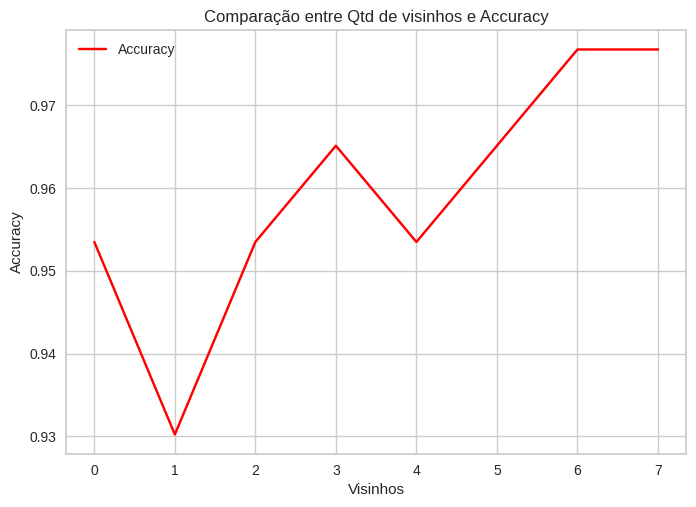

In [186]:
Tx = int (3)
listAcura =[]
listVizinho =[]
erro=[]
for i in range (8):
  knn_treino1=KNeighborsClassifier(n_neighbors=(Tx), metric='manhattan',p=1)
  knn_treino1.fit(Xtreino,ytreino)
  ypredKNN1=knn_treino1.predict(Xtest)
  ac = accuracy_score(ytest,ypredKNN1)
  er=1-ac
  erro.append(er)
  listAcura.append(ac)
  listVizinho.append(Tx)
  print("Com",Tx,"Vizinhos a acurácia eh",ac)
  Tx=Tx+1



plt.plot(listAcura, label='Accuracy', color='red', marker='x')
plt.xlabel('Visinhos')
plt.ylabel('Accuracy')
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()


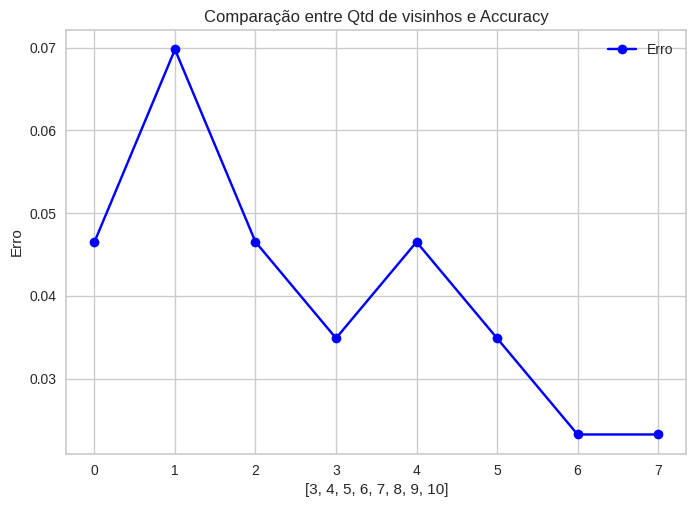

In [194]:
plt.plot(erro, label='Erro', color='blue', marker='o')
plt.ylabel('Erro')
plt.xlabel(listVizinho)
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()

### Passo 5: Considerações

1) Qual foi a melhor configuração para a árvore de decisão que você entrou no passo 4? Isto é, quais foram os valores de `criterion` e `max_depth` que produziram o melhor resultado no conjunto de validação?

**Edite esta célula e escreva sua resposta aqui**

2) Qual foi a melhor configuração para o k-NN que você entrou no passo 4? Isto é, quais foram os valores de `metric` e `n_neighbors` que produziram o melhor resultado no conjunto de validação?

**Edite esta célula e escreva sua resposta aqui**

3) Dentre os 3 modelos que você refinou no passo 4, qual teve melhor desempenho no conjunto de validação?

**Edite esta célula e escreva sua resposta aqui**

### Passo 6: Treino final

Agora que você encontrou a melhor configuração de cada modelo, faça o treinamento usando todos os exemplos de treino. A linha célula abaixo irá obter para você as matrizes de treino e teste.

In [160]:
X_train, y_train = treino.iloc[:, :-1], treino.iloc[:, -1]
X_test, y_test = teste.iloc[:, :-1], teste.iloc[:, -1]

1) Treine e teste a melhor configuração de árvore de decisão que você encontrou no passo 4

In [199]:
size1= float (2.0)
listAcura =[]
listVizinho =[]
erro=[]
for i in range (8):
  X_train, X_val, y_train, y_val = train_test_split(treino.iloc[:, :-1], treino.iloc[:, -1],random_state=42, test_size=size1/100, stratify=treino.iloc[:, -1])
  clfAV2 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
  clfAV2.fit(X_train,y_train);
  ypred=clAV2.predict(Xtest)
  ac = accuracy_score(ytest,ypredKNN1)
  er=1-ac
  erro.append(er)
  listAcura.append(ac)
  listVizinho.append(Tx)
  print("Com",Tx,"Vizinhos a acurácia eh",ac)
  size1=+1



plt.plot(listAcura, label='Accuracy', color='red', marker='x')
plt.xlabel('Visinhos')
plt.ylabel('Accuracy')
plt.title('Comparação entre Qtd de visinhos e Accuracy')
plt.legend()
plt.show()

ValueError: The test_size = 2 should be greater or equal to the number of classes = 3

2) Treine e teste novamente o Naive Bayes, do mesmo jeito que você fez no passo 3 (pode copiar e colar a célula anterior)

3) Treine e tete a melhor configuração de k-NN que você encontrou no passo 4

### Passo 7: Conclusões

O modelo que parecia o melhor no conjunto de validaç? E qual seria a melhor configuração de hiperparâmetros? Houve diferença significativa no ajuste de hiperparâmetros? Escreva aqui o que você aprendeu com este exercício.

Observe que, como o conjunto `iris` é pequeno, pode ser que muitas configurações tenham desempenho parecido ou que a configuração padrão seja a ideal. Mas o procedimento que você aprendeu aqui será o mesmo para seus experimentos futuros!

**Edite esta célula e escreva suas conclusões aqui**